# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Feature Engineering](#Feat-eng)
* [5. Machine Learning Model](#ml-model)
* [6. Winning Model](#win-model)


## 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>

[Go to Top of Notebook](#table-of-content)


## Hotel Booking Cancellation Prediction 

![Hotel Booking](https://www.gannett-cdn.com/presto/2019/05/02/USAT/5b1d7ecc-ce8d-43db-92b9-d7b61c198063-GettyImages-912299740.jpg?crop=2120,1193,x0,y0&width=3200&height=1680&fit=bounds)


>**Booking cancellation has very bad effect on the revenue of hotel management system.It affects the services,decrease the revenue**

>**Sometimes due to last minute cancellation of booking,impacts the revenue of the hotel management**
**It affects the booking and reservation planning for other customer or tourists**
**The cancellation also leads the hotel to book there rooms in very low prices**

>**Booking cancellation has strong correlation**
* Long booking window 
* Competative pricing by other Hotels
* Improper services 
* Bad reviews 



### How big is the Global Hotel Industry? :

## The global hotel industry contributes $3.4 trillion to the worldwide economy. 


* Frequent cancellation can cause damge to the revenue to hotel industry.
* The Loss of revenue could result in more complex and non friendly hotels terms like deposit or advance payment.
* The Prediction Model can help the Hotel industry to grow there buisness
* It could help them to avoid over booking reservation 



![Reservation ](https://travelleaderscorporate.com/wp-content/uploads/sites/94/2017/06/Cancel-Reservations-shutterstock_636550064-700x467.jpg)


* [Go to Top](#table-of-content)


## 2. Libraries and Custom Functions  <a class="anchor" id="import-packages"></a>


[Go to Top of Notebook](#table-of-content)


In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time




from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

# 3. Data Exploration/Prep <a class="anchor" id="data-prep"></a>
* [Go to Top of Notebook](#table-of-content)

>The purpose of this step is to know your data.Before putting values in Train/Test model.
There could be outliers,null data that could cause an error or wrong prediction in our analysis 


![Steps before deploying the data into Model](https://miro.medium.com/max/3460/1*13uV1HSrv5NefuFo85lkrg.png)


In [88]:
df = pd.read_csv("hotel_bookings.csv")

In [89]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

> **Initial Cleanup - dupes, missing values** <a class="anchor" id="missing-values"></a>


![Cleaning Data , Dump Value predict Dump analysis ](https://miro.medium.com/max/500/1*yWFQiGjlgHUVYeh4ELELyw.jpeg)

>[Go to Data Prep Outline](#data-prep)

In [91]:
#Separating categorical columns in a list
categoricals = [i for i in df.columns if df.dtypes[i] == 'object']
#Separating numerical columns in a list 
numericals = [i for i in df.columns if df.dtypes[i] != 'object']

In [92]:
print("Categorical Columns are: ", *categoricals, sep = '\n')
print("\n")
print("\n")
print("Numerical Columns are: ", *numericals, sep = '\n')

Categorical Columns are: 
hotel
arrival_date_month
meal
country
market_segment
distribution_channel
reserved_room_type
assigned_room_type
deposit_type
customer_type




Numerical Columns are: 
is_canceled
lead_time
arrival_date_year
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
booking_changes
agent
company
days_in_waiting_list
adr
required_car_parking_spaces
total_of_special_requests


There are 29 columns :10 Categorical columns and 20 Numerical columns 

In [93]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Quick Observation about the data set :

<br>1.37 percent of books were cancelled 
<br>2.Average lead time is 104 days  
<br>3.Each booking over a period has 1.8 adults, 0.1 children and 0.007 babies.
<br>4.3 % of guest are repeated guest 



In [94]:
#Check if data holds duplicate values,if it returns true ,the data set has duplicated values 
df.duplicated().any()

True

In [95]:
df.shape
#The columns and rows of the data set

(119390, 30)

**We will be calculating the null value for each column,which will help us to exclude those columns from analzying the cancellation prediction**

In [96]:
null =100 *(df.isna().sum() /df.shape[0])
null

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

**So from the above analysis we have null values in the following sequence :
>-**<br>Company->Agent->country->children**
**<br>But we have 94% of value in company as null , so we can remove this column , as it doesnt seems beneficial for our prediction model**

**We can check the data set,in which there is no value for adults ,children and babies .Normally in real life there cant be any scenarios with such bookings**

In [97]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)

In [98]:
df[filter] 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,NaN,174.0,0,Transient,0.00,0,0
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,7.0,NaN,0,Transient,100.80,0,0
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,NaN,NaN,0,Transient,0.00,1,1
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,425.0,NaN,0,Transient,73.80,0,0
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1


In [99]:
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0


Data is colletion of information .We can receive the data from sources in numeric and categorical types .
* We have to partition the data on Numerical data types and Categorical data types
* After we differentiate the data types , we have to work on that accordingly ..we will see in following steps.

>> * Numeric data types :Data which are excat numbers ,we can also call it as quantitative data.

>> * Categorical data types :Its made up of categorical charactristics such person's hometown , in this data sets we have model,segment 

![DATA ](https://365datascience.com/wp-content/uploads/2018/10/image1-1024x576.png)

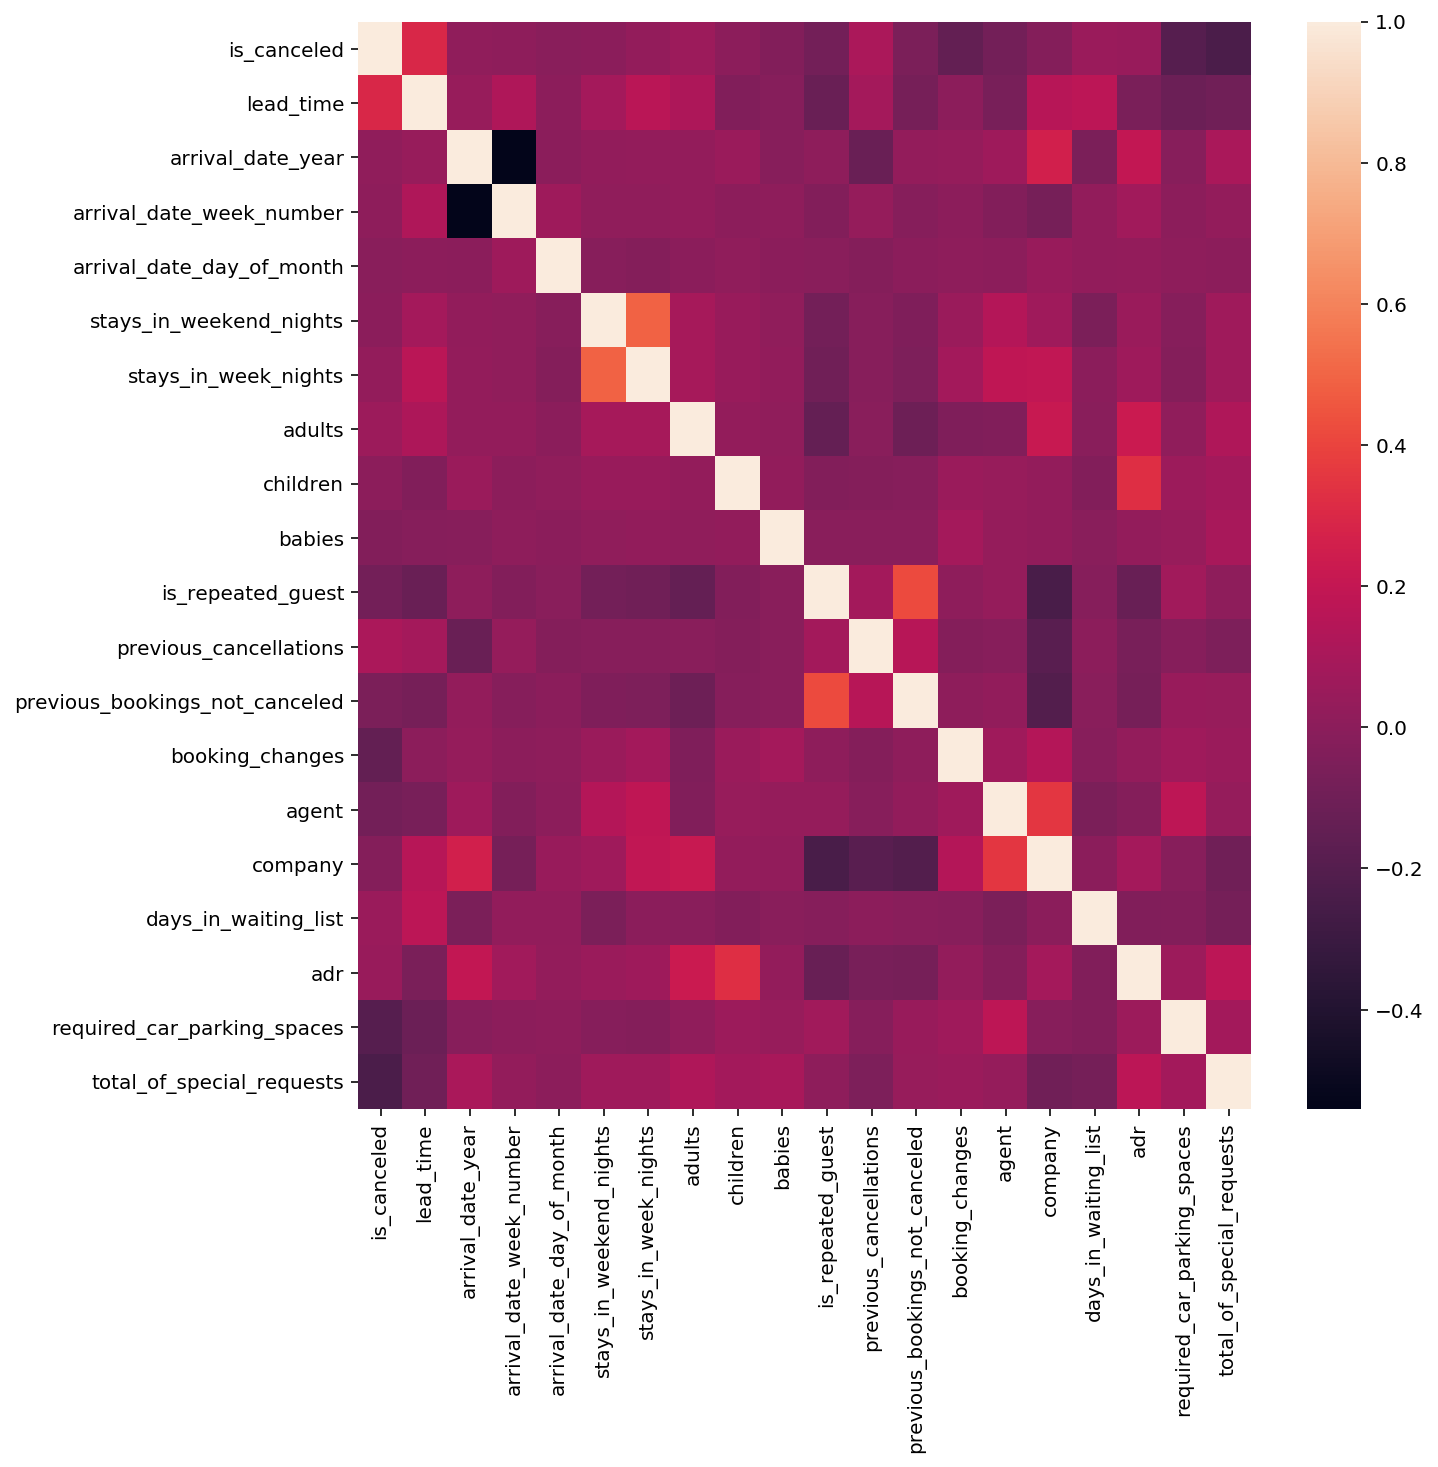

In [100]:
plt.figure(figsize = (10,10))
cormat = df.corr()
sns.heatmap(cormat)

# we will be observing the correlation of different attributes with is_canceled to check the relation, with the help of heat map.
#is_canceled Value: showing if the booking had been cancelled (1) or not (0).

In [101]:
corr= df.corr(method='pearson')['is_canceled'][:]
corr
# we will also be generating the numeric values to qucikly check the attribute that are positive and negative relation to is_canceled

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004862
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.083389
company                          -0.023439
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

**So here we have correlation between is_canceled attribute:**

>-**<br>1.High positive correlation-Lead_time ,previous_cancellation**
>-**<br>2.Negative correlation -total_of_special_request,required_car_parking_spaces,booking_changes**
>-**<br>The attribute having negative relation with Is_canceled can be droped to prevent fromd data leakage** 

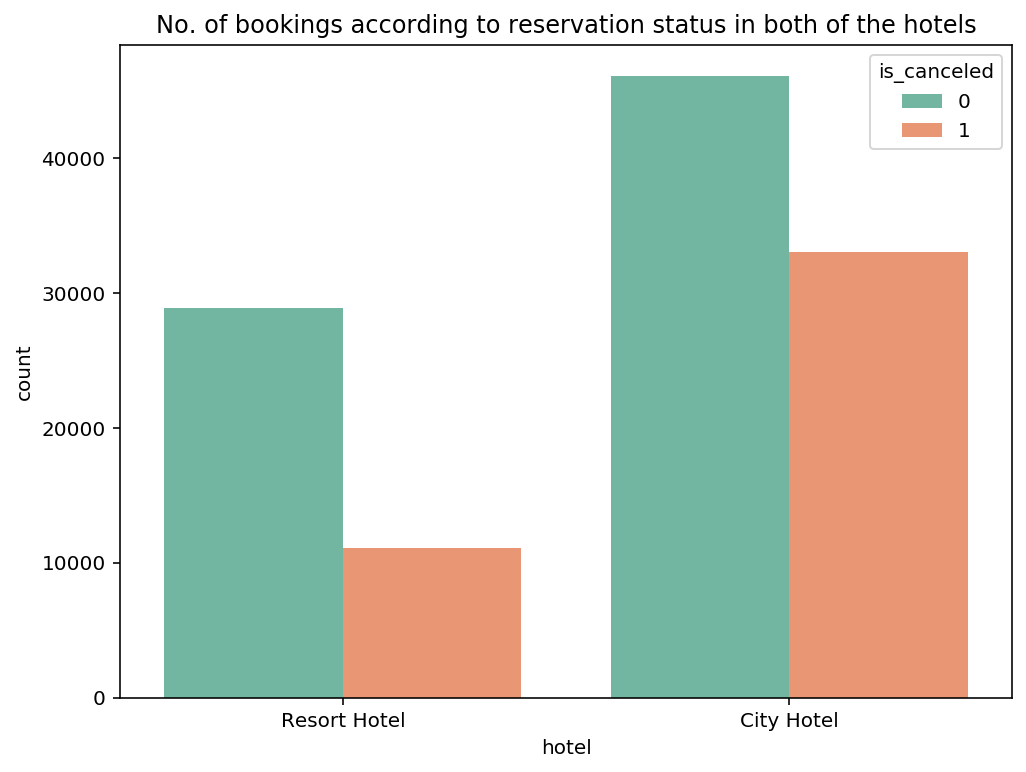

In [102]:
sns.set_palette('Set2')
plt.figure(figsize = (8,6))
sns.countplot(x = 'hotel', data = df, hue = 'is_canceled')
plt.title("No. of bookings according to reservation status in both of the hotels")
plt.show()



**<br>here we are plotting graph to understand the hotel relation with "is_canceled" ,
So we can assume from the below graph that city Hotel has high cancellation and booking rate than compared to Resort hotel.

**<br>Can we conclude that is there any issue with City hotel ?? which has high cancellation rate or it can other way round
though it has high booking due to which it had also high cancellation rate.

In [103]:
df.groupby(['hotel'])['is_canceled'].mean()

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: is_canceled, dtype: float64

**If we see %calculation City hotel accounts for 41.7% cancellation rate**

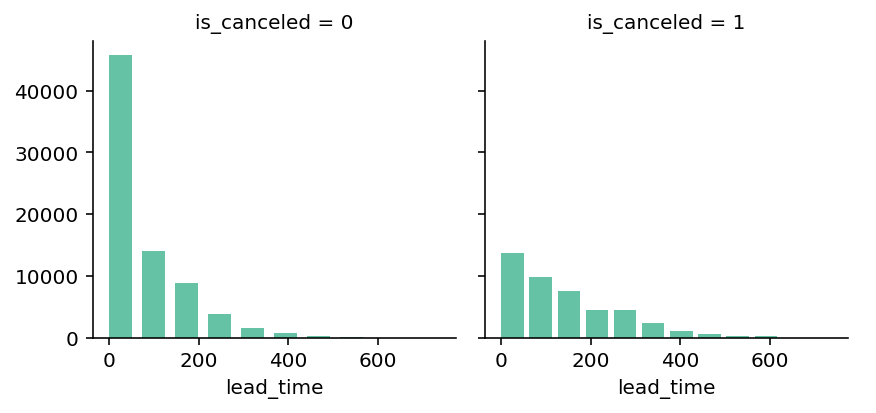

In [104]:
grid = sns.FacetGrid(df, col='is_canceled')
grid.map(plt.hist, 'lead_time', width=50)
grid.add_legend()

**<br>From the above analysis we see the lead time in booking**
**<br>We can conclude from above graphical presentation that Cancelation rate decreases with increase in lead time** 

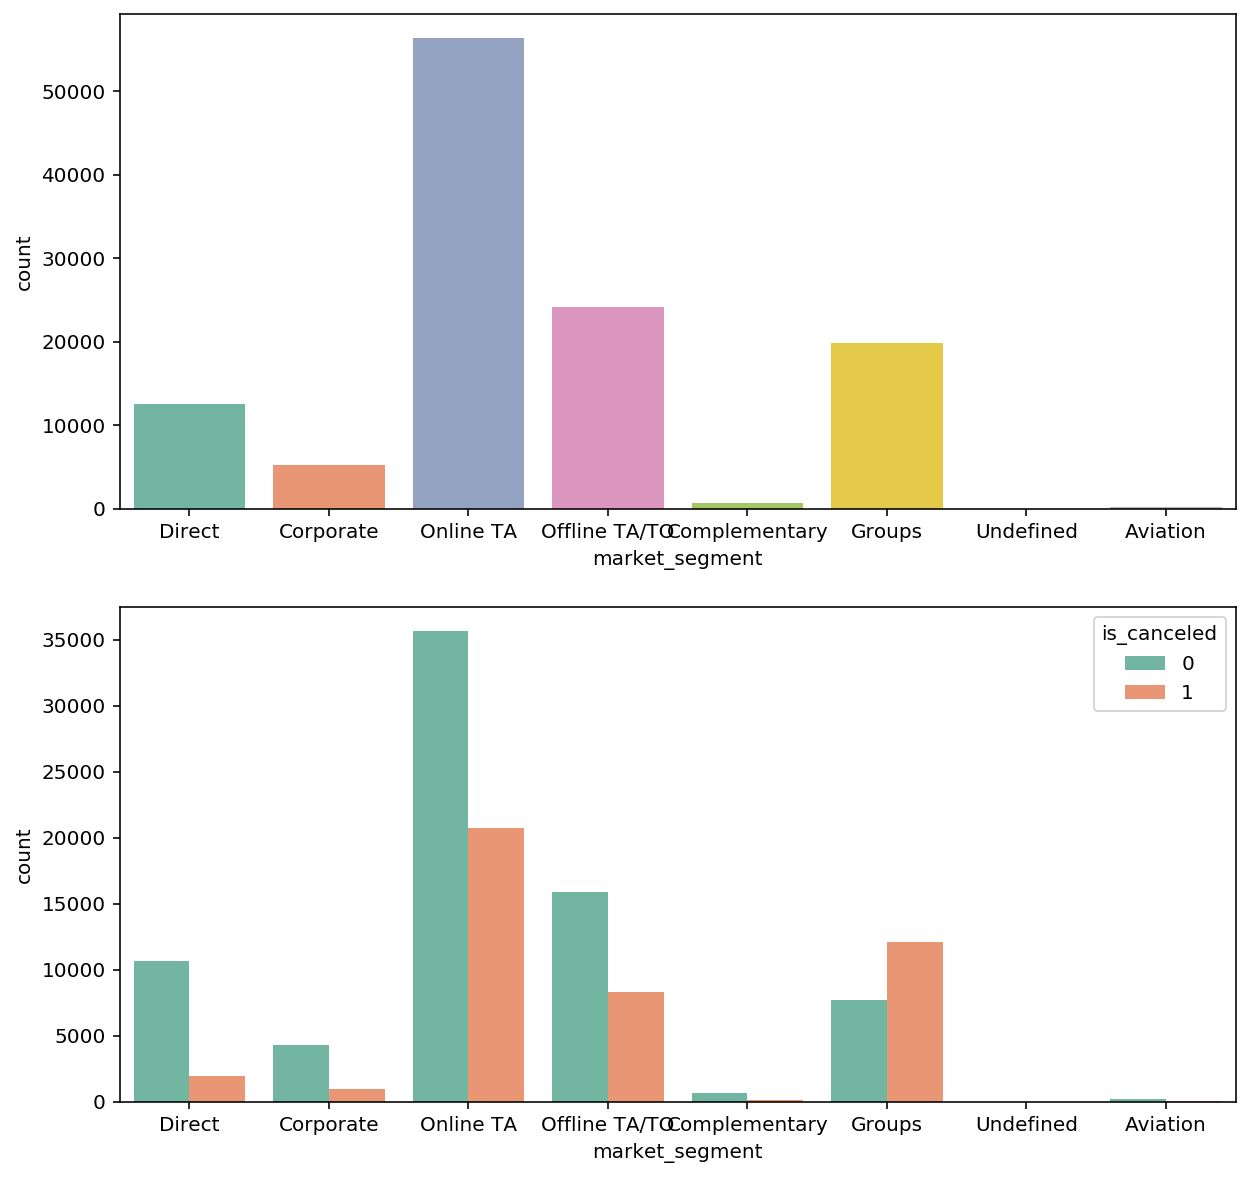

In [105]:
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,10))
sns.countplot(x = 'market_segment', data = df, ax = ax[0])
sns.countplot(x = 'market_segment', data = df, hue = 'is_canceled', ax = ax[1])
plt.show()

**<br>The chart shows the number of bookings by different market segment** 
**<br>Online TA has the highest booking and cancelation rate among all,followed by Offlibe TA,Groups and direct** 

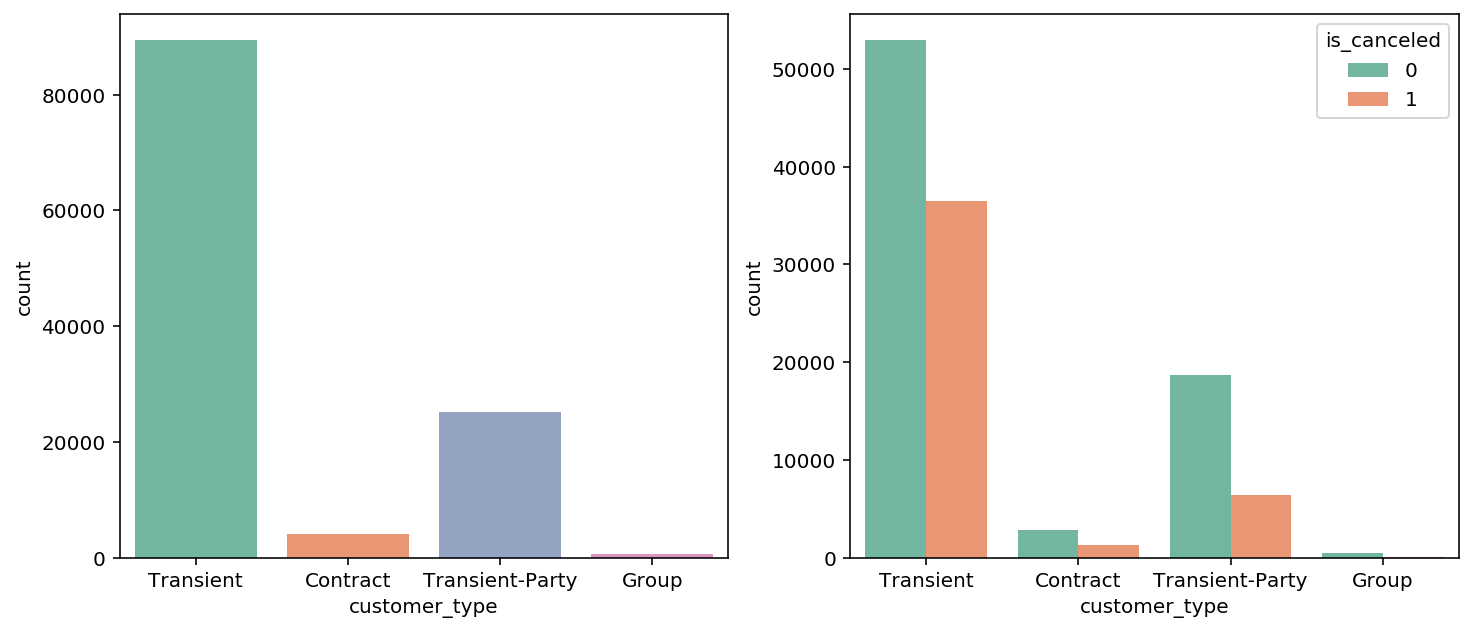

In [106]:
_, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (12,5))
sns.countplot(x = 'customer_type', data = df, ax = ax[0])
sns.countplot(x = 'customer_type', data = df, hue = 'is_canceled', ax = ax[1])
plt.show()

**Here in the plots shows the number bookings made by the customer and booking and cancelation rate for different customer type**

**The sequnce for the same is :Transient > Transient-Party > Contract > Group**

**Cancellation rate on scale of years**

>-**<br>As we can see from the below analysis that 2017 has the highest cancellation rate , followed by 2015 ,2016**

In [107]:
df.groupby(['arrival_date_year'])['is_canceled'].mean()

arrival_date_year
2015    0.370601
2016    0.358935
2017    0.387346
Name: is_canceled, dtype: float64

**cancellation rate on scale of months,we see August has high booking rate**

In [108]:
order = ['January',
 'February', 'March' ,'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December' ]

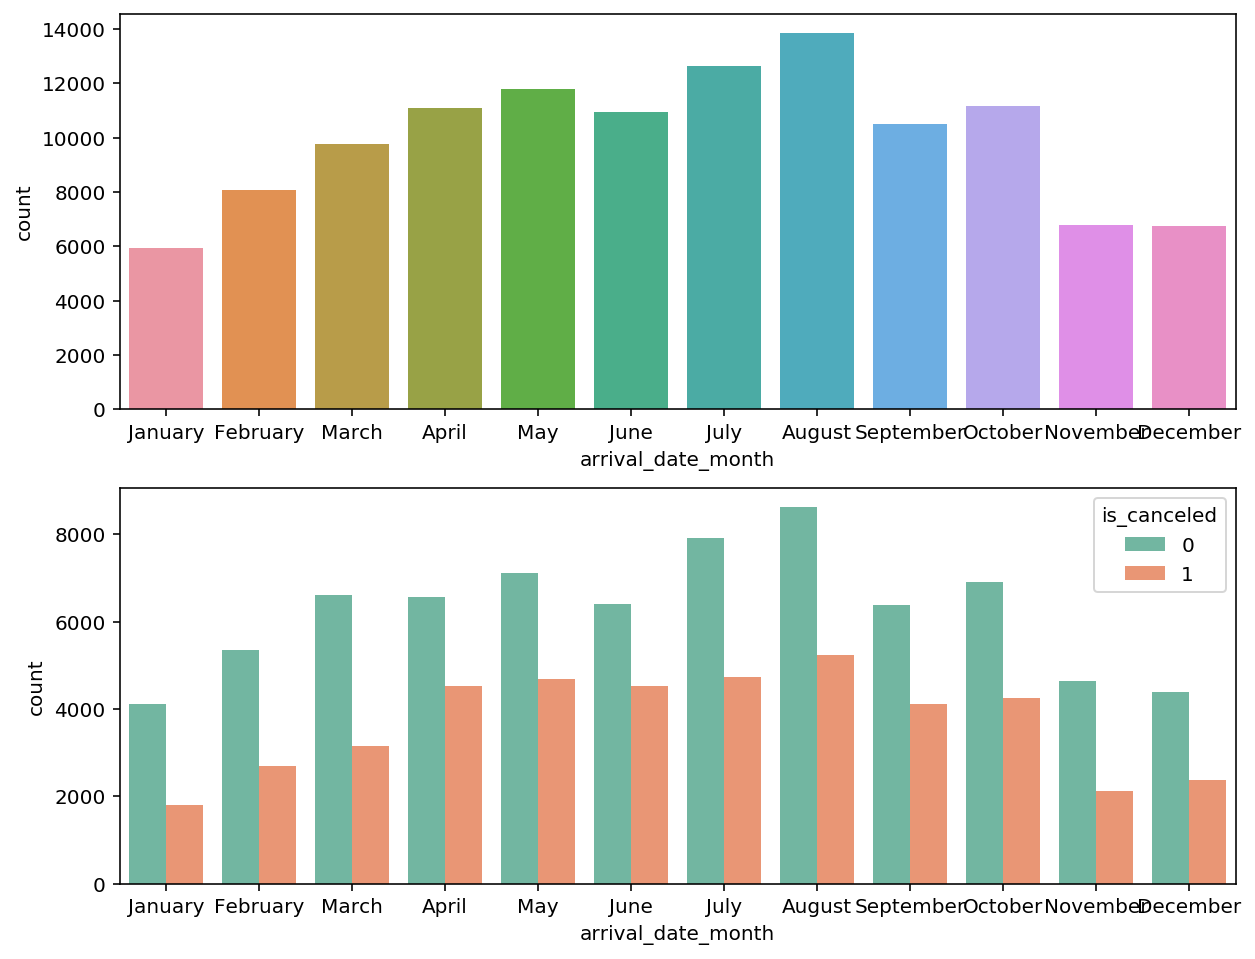

In [109]:
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,8))
sns.countplot(x = 'arrival_date_month', data = df, ax = ax[0], order = order)
sns.countplot(x = 'arrival_date_month', data = df, hue = 'is_canceled', ax = ax[1], order = order)
plt.show()

**<br>On the other hand ,The cancellation rate is quite consistently high from april to october having its peak at august**
**<br>So we can make assumption that increase in Booking has high cancellation rate**
**<br>Also,August might be great time for travellers due to which there is surge of booking**

In [110]:
import folium     #importing Folium to plot map to visualize the number of guest.
from folium.plugins import HeatMap
import plotly.express as px

In [111]:
guest_city = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_city.columns = ['Country', 'No of guests']
guest_city

,Country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,AIA,1
161,ASM,1
162,MLI,1
163,BFA,1


In [112]:
basemap = folium.Map()
guests_map = px.choropleth(guest_city, locations = guest_city['Country'],
                           color = guest_city['No of guests'], hover_name = guest_city['Country'])
guests_map.show()

**<br>The country code PRT has high number of guest followed by GBR**
**<br>If we hover our mouse in any region it give us the number of guest and country code**

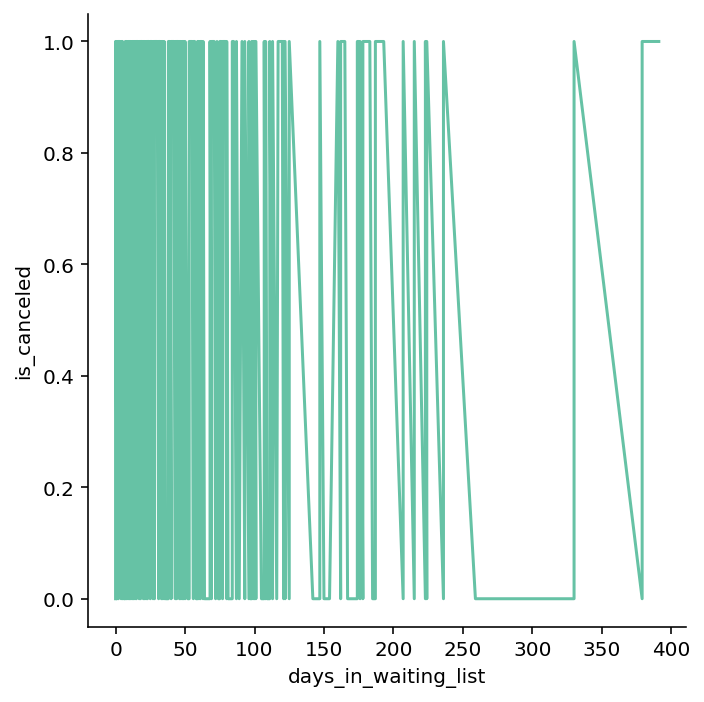

In [113]:
sns.relplot(data=df, x='days_in_waiting_list', y='is_canceled', kind='line', estimator=None)

**<br>Here we plot between "is_canceled" and "days_in_waiting_list"**
**<br>There is no relation between days_in_waiting_list and is_cancelled as there is no consistency pattern between the data**
**<br>so we can drop this column from our model**

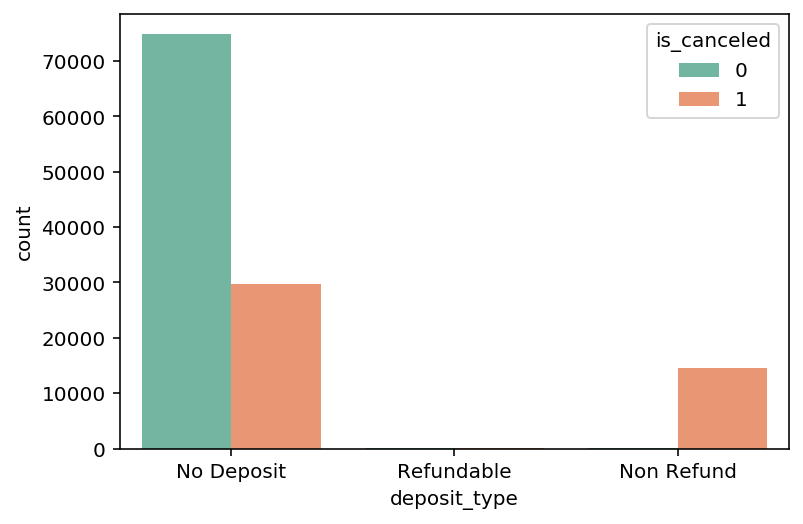

In [114]:
sns.countplot(x="deposit_type", hue="is_canceled",data=df);

**<br>Here we plot between "is_canceled" and "deposit_type"**
**<br> we can see ,bookings that are non refund have high cancellation rate**

#### Multivariate Analysis

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



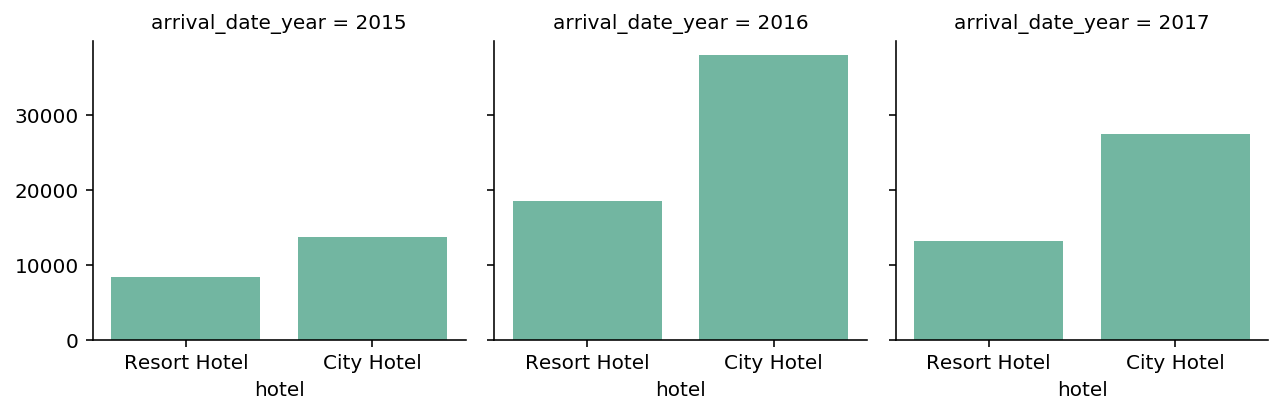

In [115]:
grid = sns.FacetGrid(df, col='arrival_date_year')
grid.map(sns.countplot, 'hotel')

In [116]:
plot_list = ['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
'previous_bookings_not_canceled',
         'required_car_parking_spaces',
 'total_of_special_requests']

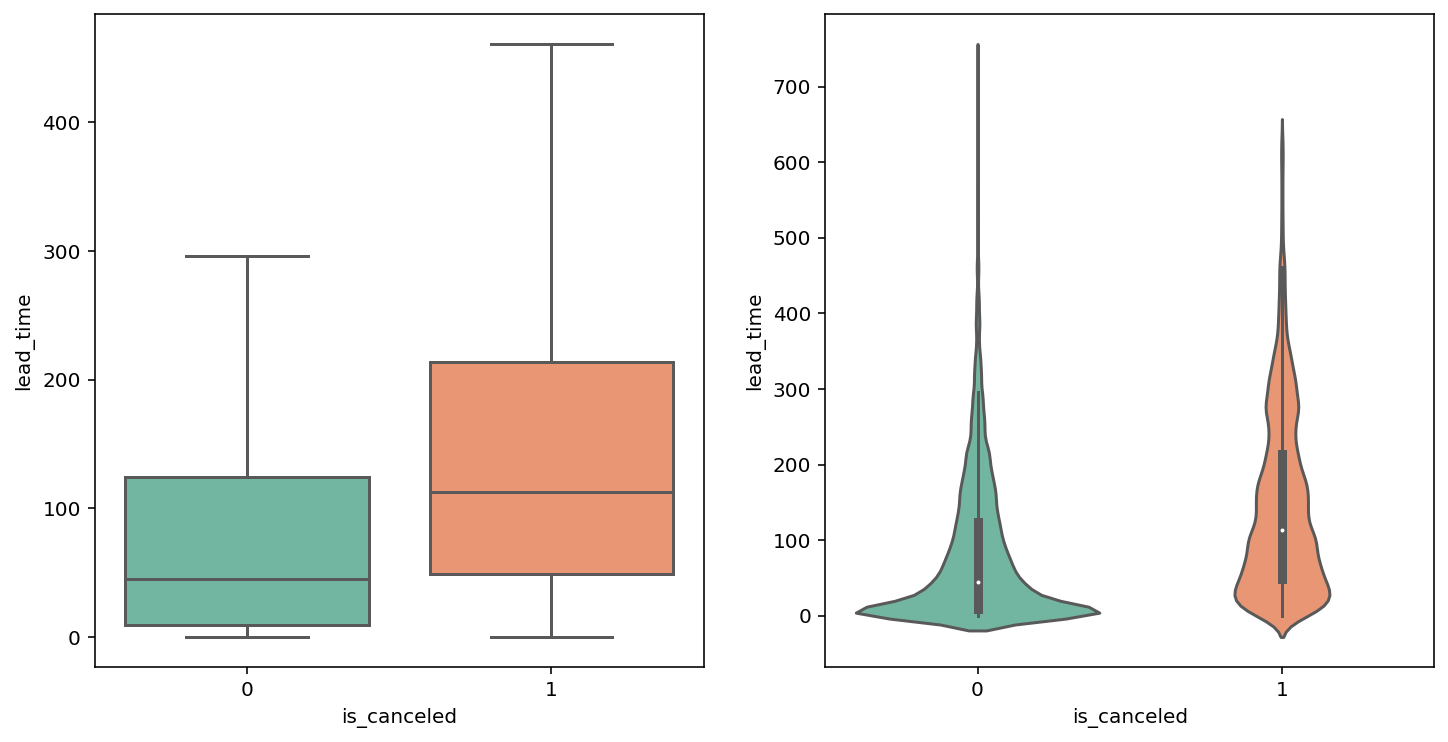

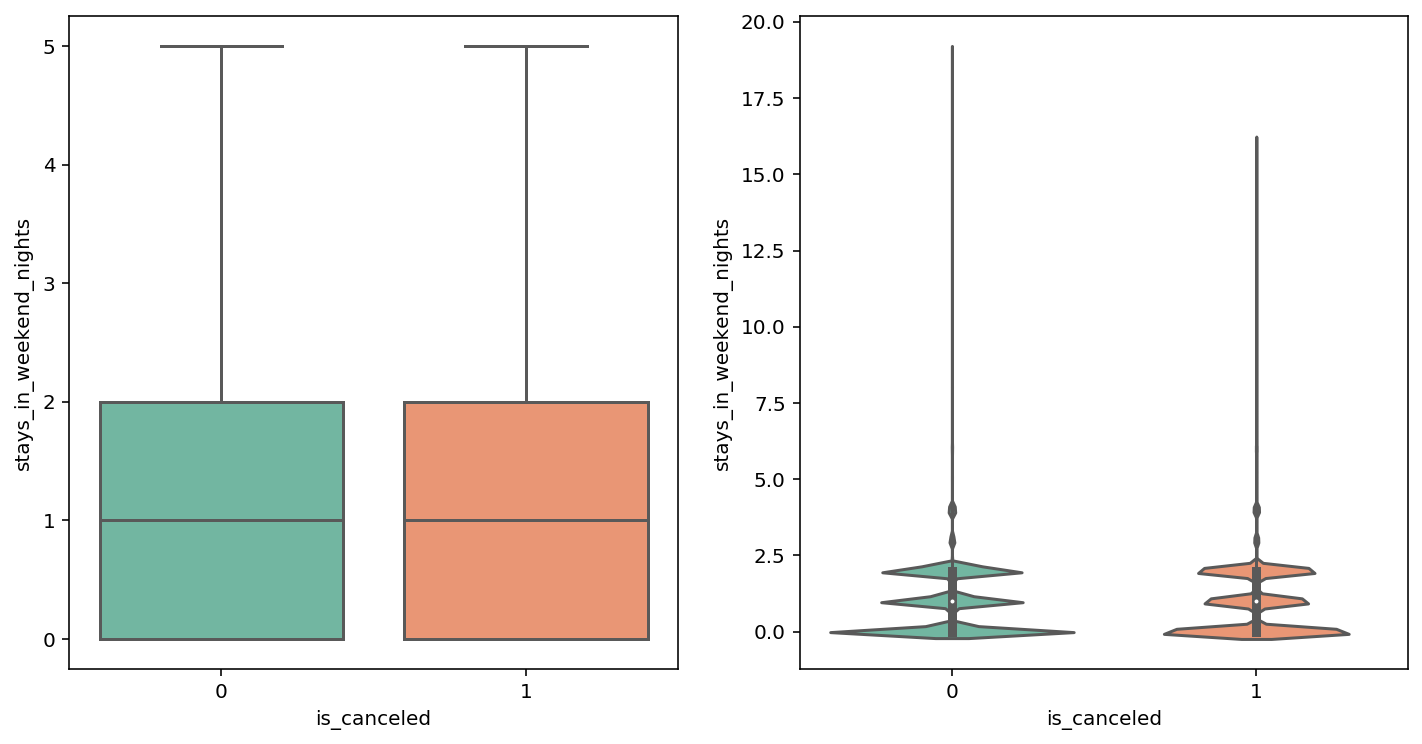

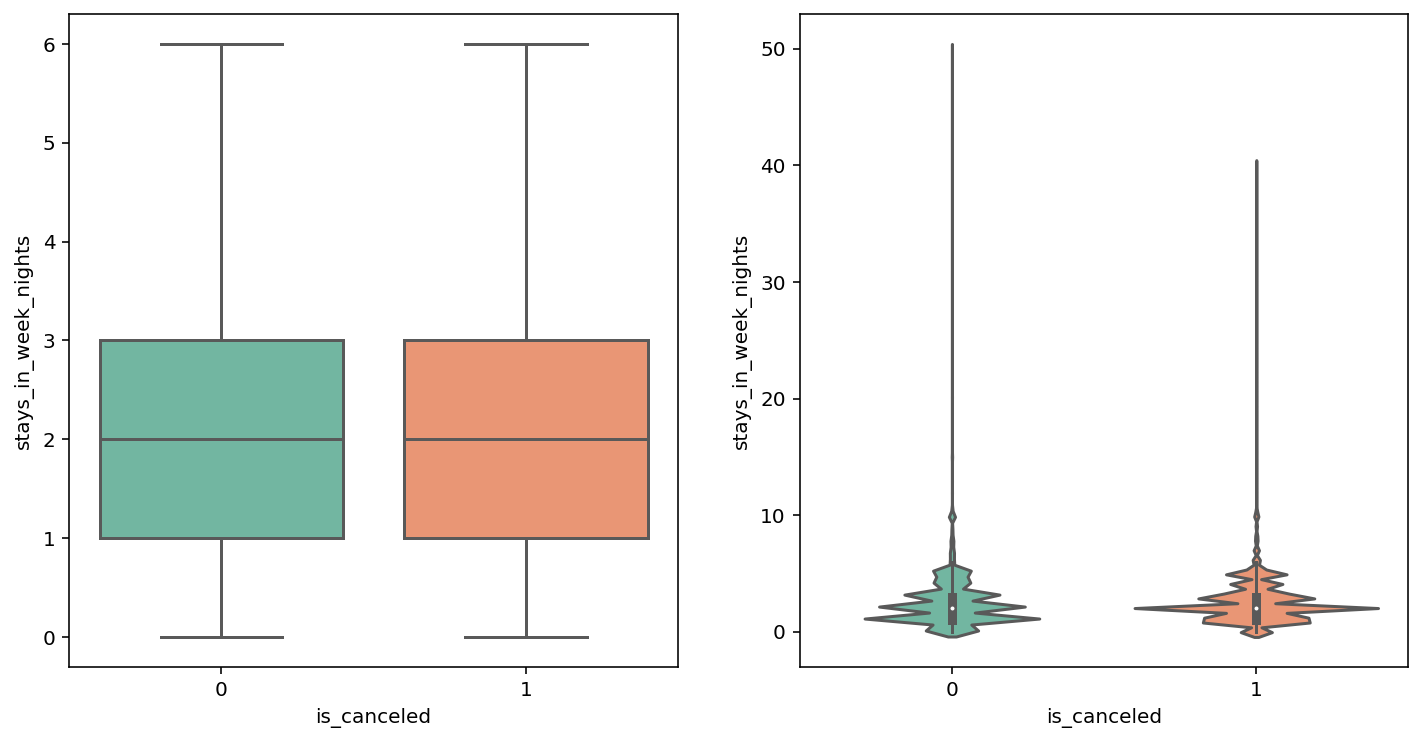

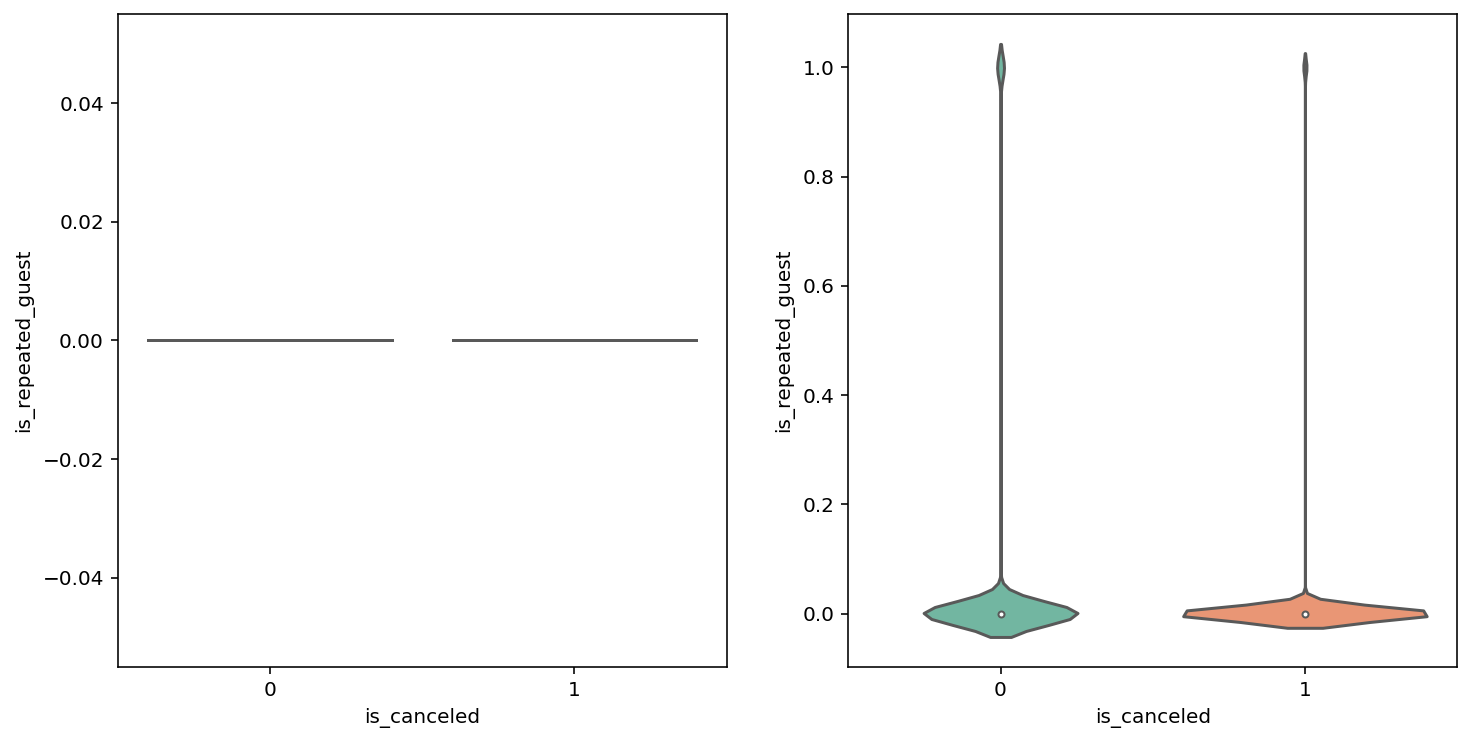

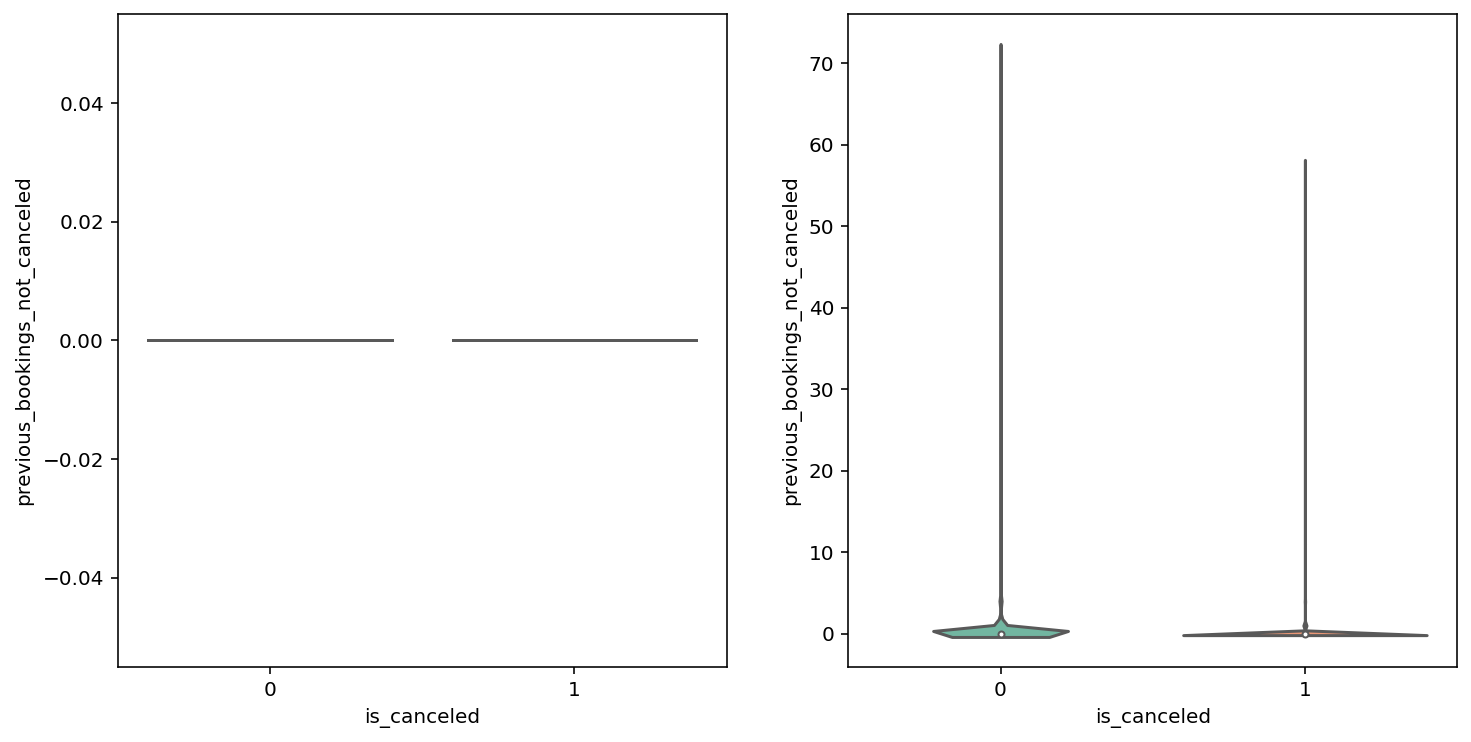

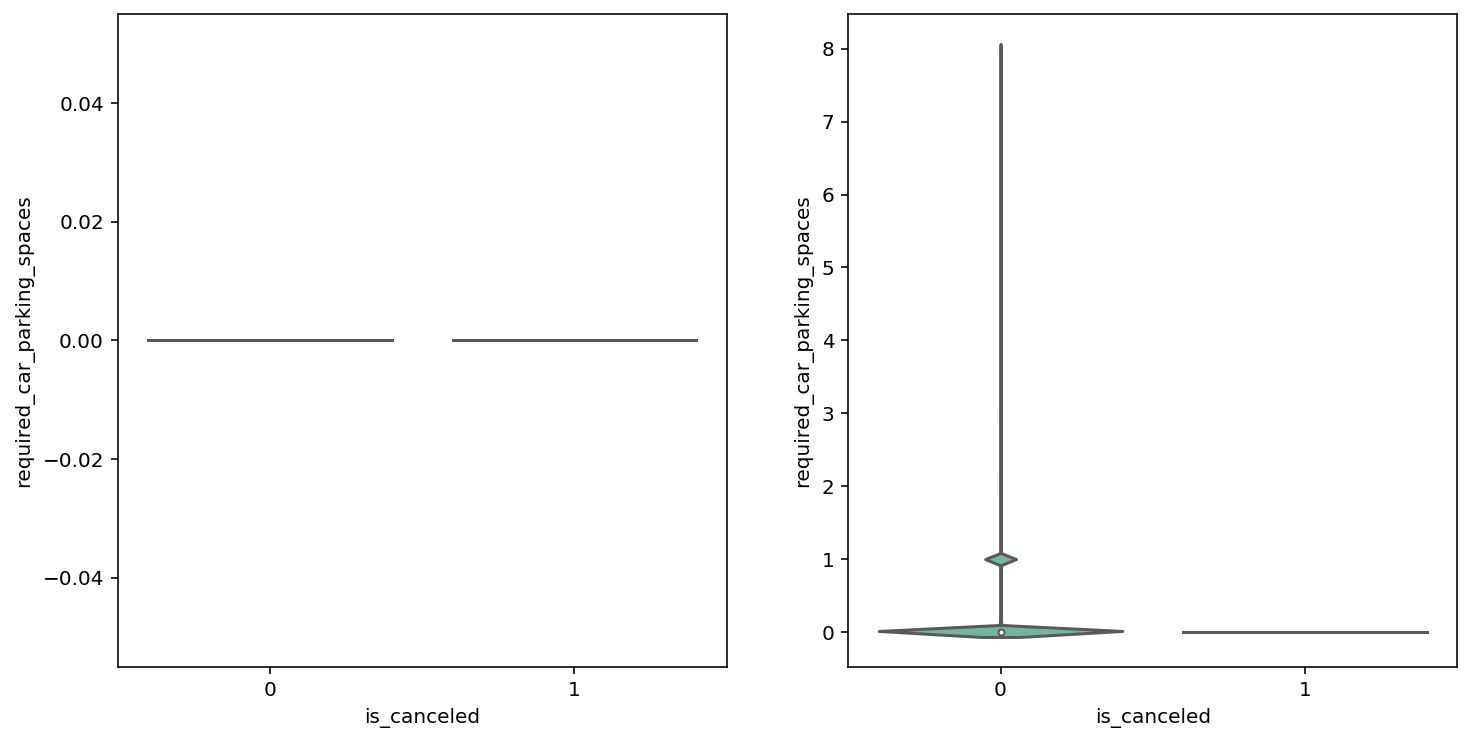

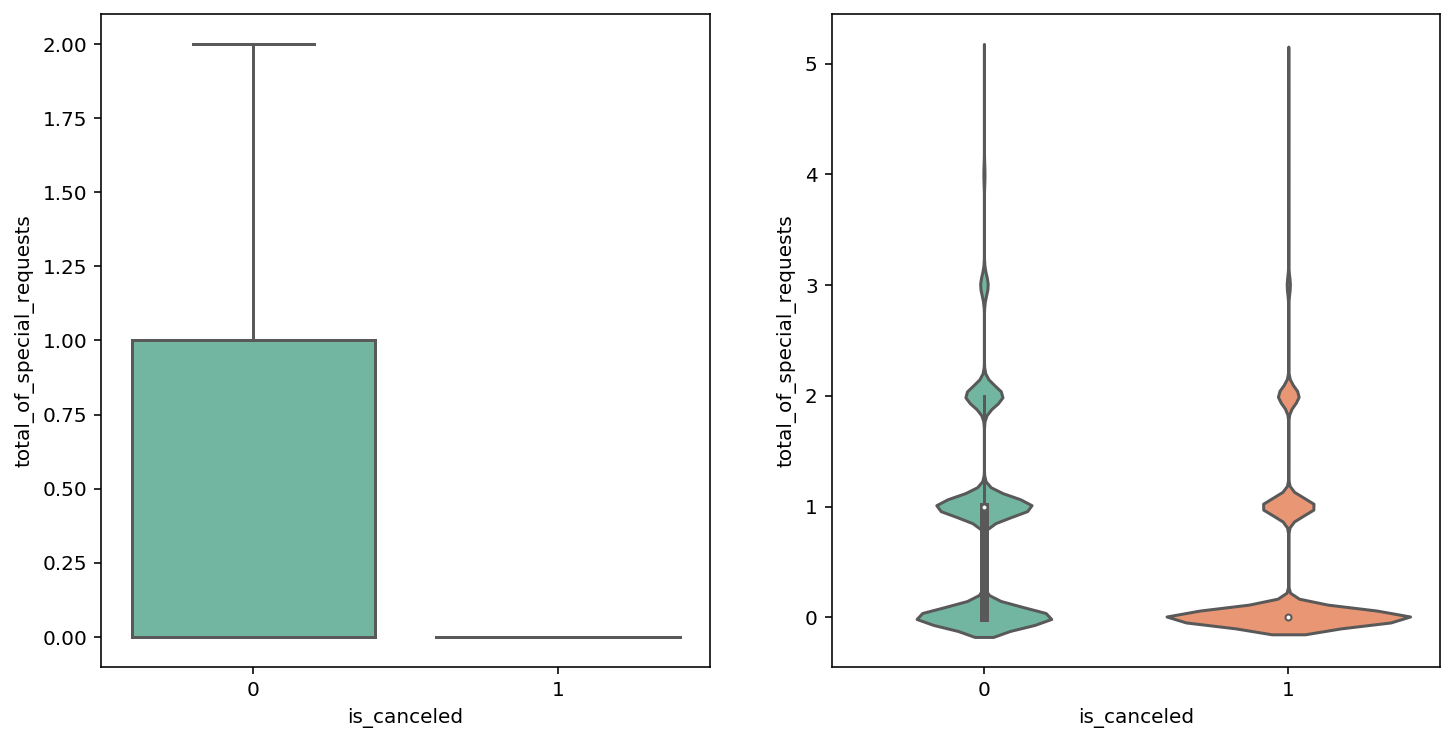

In [117]:
for i in plot_list:
    _, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (12,6))
    sns.boxplot(x = 'is_canceled', y = i, data = df, showfliers = False, ax = ax[0])
    sns.violinplot(x = 'is_canceled', y = i, data = df, showfliers = False, ax = ax[1])
    
    plt.show()

**<br>As expected, few of the features contribute very less to tell whether the customer will cancel the booking.They are
<br>1.stays in weekend nights
<br>2.stay in week nights
<br>3.repeated guest
<br>4.previous booking canceled or not
<br>5.required car parking spaces**

**We also found other attribute which has negative correlation with "is_cancelled" which will not help in model prediction** 

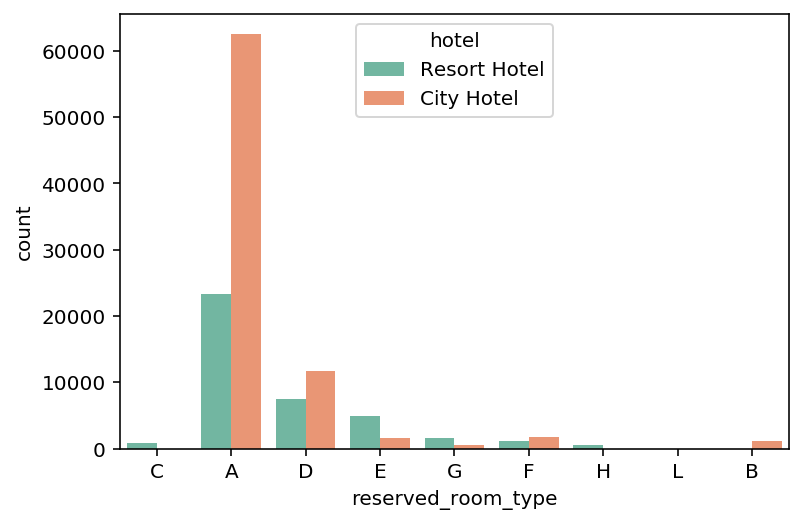

In [118]:
sns.countplot(x = 'reserved_room_type', hue = 'hotel', data = df)
plt.show()

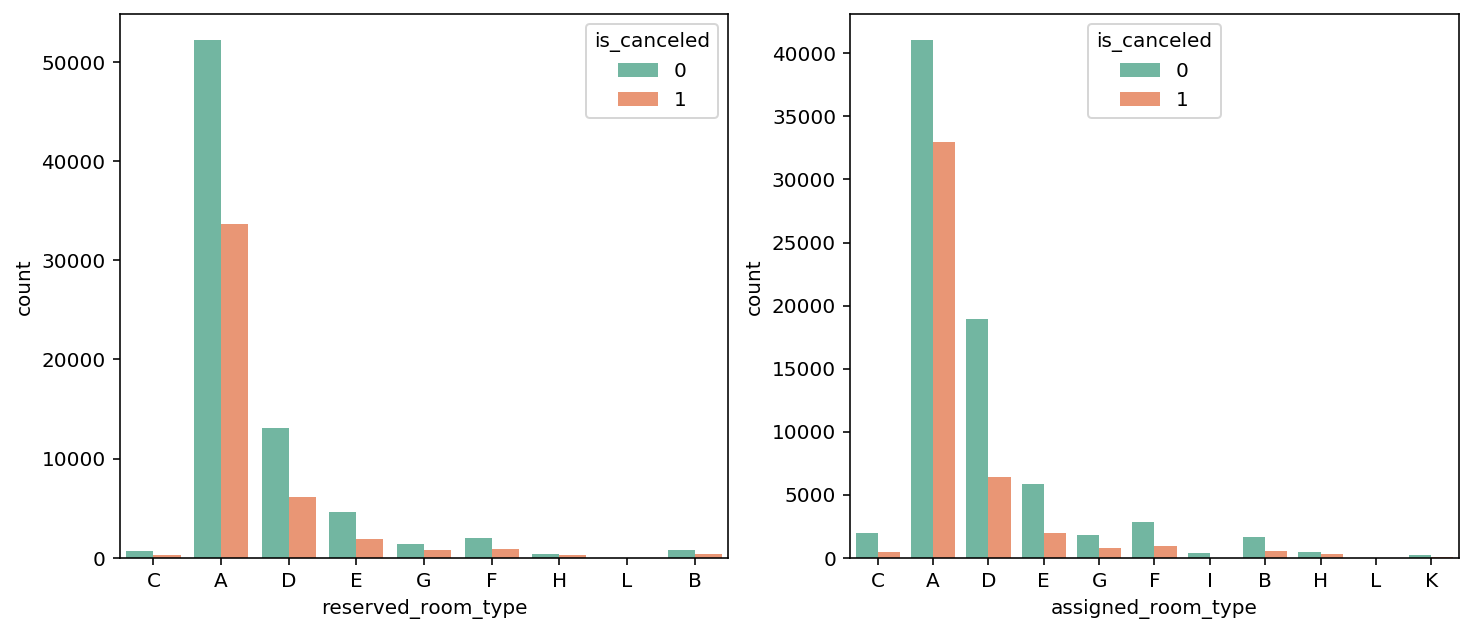

In [119]:
_, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (12,5))
sns.countplot(x = 'reserved_room_type', hue = 'is_canceled', data = df,  ax = ax[0])
sns.countplot(x = 'assigned_room_type', hue = 'is_canceled', data = df,  ax = ax[1])
plt.show()

In [120]:
unwanted_room = np.where(df['reserved_room_type'] == df['assigned_room_type'], 'Wanted', 'Unwanted')

**Here we are categorizing into Wanted category for whom room booked is what been assigned to them during check in**

In [121]:
df['unwanted_room'] = unwanted_room

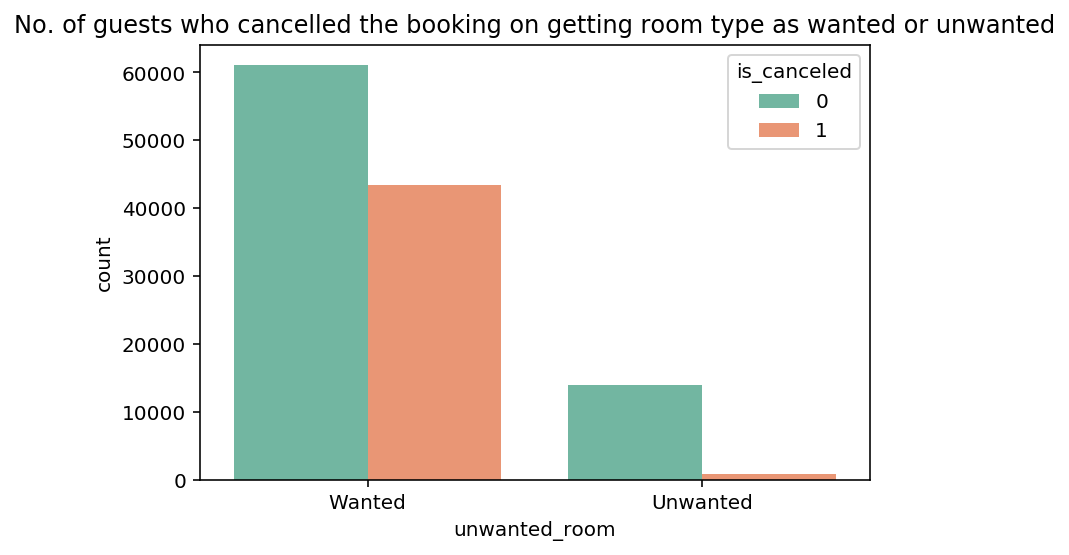

In [122]:
sns.countplot(x = 'unwanted_room', data = df, hue = 'is_canceled')
plt.title("No. of guests who cancelled the booking on getting room type as wanted or unwanted")
plt.show()

In [123]:
df.drop(['days_in_waiting_list','total_of_special_requests','required_car_parking_spaces','booking_changes','meal','unwanted_room','company'], axis = 1, inplace = True)

In [124]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent',
       'customer_type', 'adr'],
      dtype='object')

# 4. FEATURE ENGINEERING <a class="anchor" id="Feat-eng"></a>
* [Go to Top of Notebook](#table-of-content)


![Feature Engineering](https://miro.medium.com/max/1920/1*637kim0dxEy5AouQ2chsNQ.jpeg)

In [125]:
month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
df.arrival_date_month = df.arrival_date_month.map(month_map).astype(int)

In [126]:
nan_replacement_dict = {"country" : "UKNWN", 'agent' : 0.0}
df.fillna(nan_replacement_dict, inplace = True)

In [127]:
df['children'] = df['children'].fillna(0)
df['offspring'] = (df['children'] + df['babies']).astype(int)

In [128]:
df['total_bookings'] = df['previous_cancellations'] + df['previous_bookings_not_canceled']

In [129]:
# Manually Onehotencoding the hotel variable
hotel = {'Resort Hotel': 0, 'City Hotel' : 1}
         


In [130]:
df['hotel'] = df['hotel'].map(hotel)

In [131]:
lb = LabelEncoder()
var = ['customer_type', 'deposit_type','country', 'reserved_room_type', 'assigned_room_type','market_segment', 'distribution_channel', 'country']
for item in var:
    df[item] = lb.fit_transform(df[item])
df = pd.get_dummies(df, columns=['customer_type', 'deposit_type','country', 'reserved_room_type', 'assigned_room_type','market_segment', 'distribution_channel', 'country'])

In [132]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,country_168,country_169,country_170,country_171,country_172,country_173,country_174,country_175,country_176,country_177
0,0,0,342,2015,7,27,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,737,2015,7,27,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,7,2015,7,27,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,13,2015,7,27,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,14,2015,7,27,1,0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [133]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults',
       ...
       'country_168', 'country_169', 'country_170', 'country_171',
       'country_172', 'country_173', 'country_174', 'country_175',
       'country_176', 'country_177'],
      dtype='object', length=415)

## 5. Machine Learning model<a class="anchor" id="ml-model"></a>



* [Go to Top](#table-of-content)

>**We are separating the Target variable='is_canceled' and attribute for comparisons**

In [134]:
# Lets separate training and target dataset
X = df.drop('is_canceled', axis = 1)
y = df['is_canceled']

In [135]:
#Splitting them further into training and test set
X_train,  X_test,y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 40)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((83447, 414), (83447,), (35763, 414), (35763,))

In [136]:
#Data scaling
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

## Model Deployment

* Logistic Regression 
* Linear Support vector Machine
* KNN Model
* Desicion Tree
* Random Forest
* Artificial Neural Network 

>**We have used different models for prediction of hotel cancellation .We will be measuring different parameters to understand the winning model from the below.These will help to understand the how good is our model.**

>**Parameters used:**

<br>**Average cross Validation** - The Purpose of using these parameters is to understand the accuracy score of the model avoiding over fitting and underfitting .we will be taking 'K' Value as 5 in all the model and average score will from 5 experiments.it will also be a good metric to evaluate our imbalanced data

<br>**Accuracy Score** -This metric will asses the performance of the classification model, but it can consider data noise in the accuracy score. But we have Average cross Validation to compare with Accuracy score and understand if we missed any outliers in the data.

<br>**F1 Score** -F1 Score will be perfect metric to know about how good the model is predict with good precision and good recall.

<br>**Confusion matrix** - To further dive into F1 Score , we will be analysing on Confusion matrix (TP,FP,FN,TN)



In [137]:
#Logistic Regression
start = time.time()
logreg = LogisticRegression(max_iter=500).fit(X_train_mm, y_train)
scores = cross_val_score(logreg, X_train_mm, y_train, cv=5)
logreg_pred = logreg.predict(X_test_mm)
end = time.time()

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
print(confusion_matrix(y_test, logreg_pred))

print(f"Runtime of the program is {end - start}")

Average cross validation score: 0.782
Test accuracy: 0.787
F1 score: 0.665
[[20576  2011]
 [ 5610  7566]]
Runtime of the program is 147.27815794944763


#### Analysis1

>**Average cross validation -We cant say the score is good as 1 , but 0.782 overall is good score from which we can assume it
will not fall under overfitting /under fitting model**

>**Test Accuracy - Accuracy score is 78 % from the score range we can assume it is good model**

       **Over 90% - Very good
         Between 70% and 90% - Good
         Between 60% and 70% - OK
         Below 60% - Poor  **

>**F1 Score -But we see from F1 Score , the model is not that efficient in terms of precision and recall, which means we can have Positive cases as well as false negative cases**

>**Confusion Matrix -From the matrix , we understand TP=20576,FP=2011,FN=5610,TN=7566
                     Recall =78 %
                     Precision =91 %
here we have high Precision value but low Recall value , so we have penalized for low recall score for which F1 Score is low** 


In [ ]:
#Linear SVC
start = time.time()
svc = LinearSVC().fit(X_train_mm, y_train)
scores = cross_val_score(svc, X_train_mm, y_train, cv=5)
svc_pred = svc.predict(X_test_mm)
end = time.time()
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(svc.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, svc_pred)))
print(confusion_matrix(y_test, svc_pred))

print(f"Runtime of the program is {end - start}")

#### Analysis2

>**Average cross validation -We cant say the score is good as 1 , but 0.785 overall is good score from which we can assume it
will not fall under overfitting /under fitting model**

>**Test Accuracy - Accuracy score is 78.8 % from the score range we can assume it is good model**

       **Over 90% - Very good
         Between 70% and 90% - Good
         Between 60% and 70% - OK
         Below 60% - Poor  **

>**F1 Score -But we see from F1 Score , the model is not that efficient in terms of precision and recall, which means we can have Positive cases as well as false negative cases**

>**Confusion Matrix -From the matrix , we understand TP=20784,FP=1803,FN=5764,TN=7412
                     Recall =78.2 %
                     Precision =92 %
here we have high Precision value but low Recall value , so we have been penalized for low recall score for which F1 Score is low** 


In [ ]:
#SGD Classifier
start = time.time()
sgd = SGDClassifier(alpha=0.1).fit(X_train_std, y_train)
scores = cross_val_score(sgd, X_train_std, y_train, cv=5)
sgd_pred = sgd.predict(X_test_std)
end = time.time()
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(sgd.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, sgd_pred)))
print(confusion_matrix(y_test, sgd_pred))

print(f"Runtime of the program is {end - start}")

#### Analysis3

>**Average cross validation -We cant say the score is good as 1 , but 0.754 overall is good score from which we can assume it
will not fall under overfitting /under fitting model**

>**Test Accuracy - Accuracy score is 75.5 % from the score range we can assume it is good model**

       **Over 90% - Very good
         Between 70% and 90% - Good
         Between 60% and 70% - OK
         Below 60% - Poor**

>**F1 Score -But we see from F1 Score , the model is not that efficient in terms of precision and recall, which means we can have high Positive cases as well as false negative casesas compared to above two**

>**Confusion Matrix -From the matrix , we understand TP=22448,FP=139,FN=8609,TN=4567
                     Recall =72.2 %
                     Precision =99 %
here we have high Precision value beacuse of low FP and high TP cases but there is increase of FN Value than other two models**

In [ ]:
#Ridge Classifier
start = time.time()
rc = RidgeClassifier(alpha=1, normalize=True)
rc.fit(X_train, y_train)
scores = cross_val_score(rc, X_train, y_train, cv=5)
rc_pred = rc.predict(X_test)
end = time.time()
print("Normalized data:")
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(rc.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, rc_pred)))
print(confusion_matrix(y_test, rc_pred))

print(f"Runtime of the program is {end - start}")

rc = RidgeClassifier(alpha=1)
rc.fit(X_train_std, y_train)
scores = cross_val_score(rc, X_train_std, y_train, cv=5)
rc_pred = rc.predict(X_test_std)
print("Standard scaled data:")
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(rc.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, rc_pred)))
print(confusion_matrix(y_test, rc_pred))

#### Analysis4

>**Average cross validation -We cant say the score is good as 1 , but 0.77 overall is good score from which we can assume it
will not fall under overfitting /under fitting model for both Normalized data and standard scale data**

>**Test Accuracy - Accuracy score is 77.7-77.3 % from the score range we can assume it is good model**

       **Over 90% - Very good
         Between 70% and 90% - Good
         Between 60% and 70% - OK
         Below 60% - Poor**

>**F1 Score -But when see from F1 Score , the model is not that efficient for normalized data but Standard scale data have better F1 Score**

>**Confusion Matrix -From the matrix , we understand TP=21812,FP=775,FN=7347,TN=5829
                     Recall =74 %
                     Precision =96 %
here we have high Precision value but low Recall value for Normalized data , lets check for standardized Data :
TP=20997,FP=1590,FN=6303,TN=6873
                    Recall=76 %
                    Precision=92.9%
 Though we have good recall value than Normalized data but less precision value as compared to standard data. We have been less penalized in standard data for which F1 Score is better**

In [ ]:
#KNN
start = time.time()
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 6)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

end = time.time()
print(f"Runtime of the program is {end - start}")

In [ ]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_pred = knn.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(knn.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, knn_pred)))
print(confusion_matrix(y_test, knn_pred))

end = time.time()
print(f"Runtime of the program is {end - start}")

#### Analysis5

>**Average cross validation -We cant say the score is good as 1 , but 0.77 overall is good score from which we can assume it
will not fall under overfitting /under fitting model for both Normalized data and standard scale data**

>**Test Accuracy - Accuracy score is 77.6 % from the score range we can assume it is good model**

       **Over 90% - Very good
         Between 70% and 90% - Good
         Between 60% and 70% - OK
         Below 60% - Poor**

>**F1 Score -But when see from F1 Score of 0.691 which is better than above all**

>**Confusion Matrix -From the matrix , we understand TP=18800,FP=3787,FN=4219,TN=8957
                     Recall =81 %
                     Precision =83.2 %
here we can see there is increase in recall and decrease in precision value , but due to increase in recall value we have been less penalized.For better F1 Score recall and Precision value should be high**

In [ ]:
#Decision Tree
start = time.time()
tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5)
tree_pred = tree.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))

end = time.time()
print(f"Runtime of the program is {end - start}")

#### Analysis6

>**Average cross validation -We cant say the score is good as 1 , but 0.749 overall is good score from which we can assume it
will not fall under overfitting /under fitting model for both Normalized data and standard scale data**

>**Test Accuracy - Accuracy score is 75.2 % from the score range we can assume it is good model**

       **Over 90% - Very good
         Between 70% and 90% - Good
         Between 60% and 70% - OK
         Below 60% - Poor**

>**F1 Score -But when see F1 Score of 0.494, its a worst model . Though we have good Accuracy model but there is high chances of getting False Negative and False postive along with Positive cases.To further understand these score we will dive down to COnfusion Matrix** 

>**Confusion Matrix -From the matrix , we understand TP=22562,FP=25,FN=8846,TN=4330
                     Recall =71%
                     Precision =99%
here we can see though we have high precision value but less recall score for which F1 score is less**

In [ ]:
start = time.time()
def classifier(train, test, estimator, param_grid):
    grid_search = GridSearchCV(estimator, param_grid, cv=5)
    grid_search.fit(train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    print("Test score: {:.3f}".format(grid_search.score(test, y_test)))

def feature_selection(model):
    select_features = SelectFromModel(estimator=model, threshold='median')
    select_features.fit(X_train, y_train)
    X_train_select = select_features.transform(X_train)
    X_test_select = select_features.transform(X_test)
    return X_train_select, X_test_select

def run_model(model, model_feature, param_grid):
    print("Before feature selection:")
    classifier(X_train, X_test, model, param_grid)
    X_train_select, X_test_select = feature_selection(model_feature)
    print("After feature selection")
    classifier(X_train_select, X_test_select, model, param_grid)
    
end = time.time()
print(f"Runtime of the program is {end - start}")

In [ ]:
#Random Forest
start = time.time()
param_grid = {'n_estimators':[50,75,100], 'max_depth':[1,2,5]}
run_model(RandomForestClassifier(), RandomForestClassifier(n_estimators=50, max_depth=2), param_grid)
end = time.time()
print(f"Runtime of the program is {end - start}")

#### Analysis7


>**Here we have two comparsion i.e. 1.Before feature selection 2.After Feature selection 
The Test Score from both Selection is around 76% model correctly predicted**

In [ ]:
#Multi Layer Perceptron
start = time.time()
mlp = MLPClassifier(hidden_layer_sizes=[35, 20], alpha=0.001, solver='adam', activation='relu')
mlp.fit(X_train_std, y_train)
mlp_pred = mlp.predict(X_test_std)
print("Train score: {:.3f}".format(mlp.score(X_train_std, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
print(confusion_matrix(y_test, mlp_pred))
end = time.time()
print(f"Runtime of the program is {end - start}")

#### Analysis8

>**we see Train Score and test Score is above 80 % i.e. 85.6 % and 83.1% ,we can conclude that models works good both in test data and train data .There will be less chance our model to show overfitting /underfitting**

>**F1 Score -But when see F1 Score of 0.757,is good** 

>**Confusion Matrix -From the matrix , we understand TP=20291,FP=2296,FN=3759,TN=9417
                     Recall =84%
                     Precision =89%
We have very high score in both Recall and Precision score , for which F1 score is high than others model**

## 6. Winning Model<a class="anchor" id="win-model"></a>



* [Go to Top](#table-of-content)


![Winning Model](https://webstockreview.net/images/clipart-png-trophy-3.png)

**To Decide the winning model , we will analyze the different metric that we have analyzed in above model**
**We will select the model on basis of Prediction and F1 score as well as there is another parameter i.e. Time taken for execution**

>**1.Artificial neural network and KNN are best model in terms of Accuracy and F1 Score . Model can give us Good prediction about the hotel booking cancellation.But Artificial Neural network is the best model both in terms of Accuracy above 80%  more and time execution 128 secs  than KNN model**

>**2.But If we look at the execution Time , logistics regression is better model with pretty good accuracy model and running time 128 secs** 


## Suggestion:

**There can be other data we could have included to improve our model/dataset:**

>**1.Customer reviews -*In today's internet era , the reviews plays a important role for to know about hotels and services before booking.In many cases the customer realises bad reviews about the hotel and cancel the booking*.**

>**2.Competative Price- *The Price comparision or any metric which describes the booking as "Good deal" or "bad Deal" could have helped us to deep dive into more hidden reasons for cancellation.Which could have helped us to create more efficient model to predit the cancellation*.**

>**3.Amenitites - *The avaliability of amenities in hotel could have helped in more better way to predict the behaviour of customer towards the amenities provided and cancellation prediction*.**

>**4.Customer Feedback- *The customer feedback should also be recorded, to know whether the cancellation has occured due to customer health issue or any natural disaster*.**

![Neural Network](https://static.vecteezy.com/system/resources/previews/000/359/284/original/artificial-neural-networks-banner-a-form-of-connectionism-anns-computing-systems-inspired-by-the-biological-neural-networks-vector-illustration.jpg)